In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [405]:
#loading the dataset
df=pd.read_csv('Advertising.csv')

#****Data Preprocessing****

In [406]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [407]:
#Checking for missing values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [408]:
#Checking for duplicated records
df.duplicated().sum()

0

In [409]:
#Dropping column 'Unnamed: 0'
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [410]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [411]:
#Scaling the features
#The target variable is continuous and so we scale it to get a better understanding
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df=pd.DataFrame(sc.fit_transform(df),columns=df.columns)
df.head(10)

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882
5,0.027054,0.985887,0.656992,0.220472
6,0.192087,0.661290,0.204046,0.401575
7,0.404126,0.395161,0.099384,0.456693
8,0.026716,0.042339,0.006157,0.125984
9,0.673318,0.052419,0.183817,0.354331


#****EDA(Exploratory Data Analysis)****

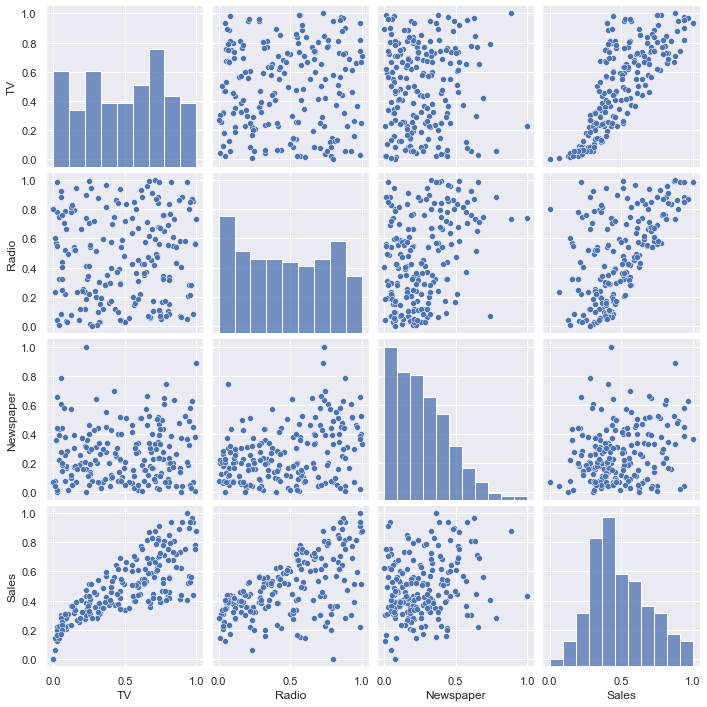

In [412]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Heatmap')

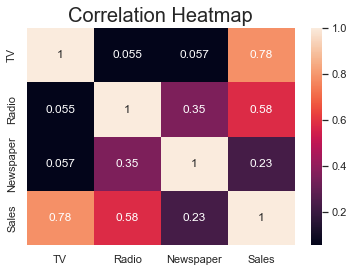

In [413]:
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Heatmap',fontsize=20)

Text(0.5, 1.0, 'TV advertisement VS Sales')

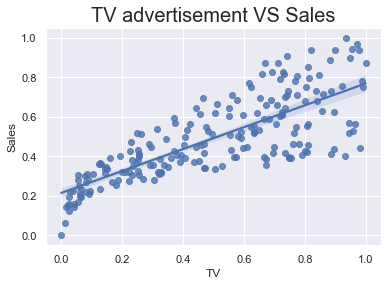

In [414]:
sns.regplot(x=df['TV'],y=df['Sales'])
plt.title('TV advertisement VS Sales',fontsize=20)

Text(0.5, 1.0, 'Radio advertisement VS Sales')

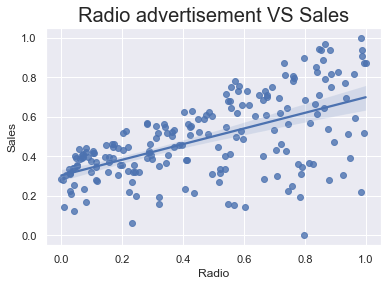

In [415]:
sns.regplot(x=df['Radio'],y=df['Sales'])
plt.title('Radio advertisement VS Sales',fontsize=20)

Text(0.5, 1.0, 'Newspaper advertisement VS Sales')

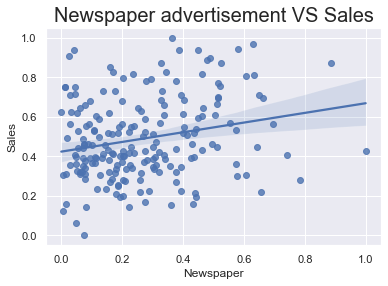

In [416]:
sns.regplot(x=df['Newspaper'],y=df['Sales'])
plt.title('Newspaper advertisement VS Sales',fontsize=20)

#****Model Selection and Evaluation****

In [417]:
X=df.drop(columns=['Sales'],axis=1).values
y=df['Sales'].values

In [418]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [419]:
from sklearn.metrics import mean_squared_error,r2_score

In [420]:
#Implementing Lasso Regression
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(X_train,y_train)

y_pred=ls.predict(X_test)
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

Mean Squared Error: 0.0398636826765841
R2 score: -0.024110186691341795


In [421]:
#Implementing Ridge Regression
from sklearn.linear_model import Ridge
rd=Ridge()
rd.fit(X_train,y_train)

y_pred=rd.predict(X_test)
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

Mean Squared Error: 0.003954168580973359
R2 score: 0.8984162011191118


In [422]:
#Implementing multiple Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

Mean Squared Error: 0.003954003062733435
R2 score: 0.8984204533332629


In [423]:
#Implementing RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

Mean Squared Error: 0.000537852276954557
R2 score: 0.9861824106861093


In [424]:
#Implementing DecisionTree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

Mean Squared Error: 0.0016825283650567311
R2 score: 0.9567753322734562


#****Conclusion****

We select RandomForest Regressor as our sales prediction model as it shows consistent good r2 score and low mean squared error over most variations of the dataset.